### PREDICTING THE LIKELIHOOD OF E-SIGNING A LOAN BASED ON FINANCIAL HISTORY








PROBLEM STATEMENT
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
















##### IMPORTING RELEVANT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
df= pd.read_csv("data.csv")

In [3]:
df.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
entry_id                17908 non-null int64
age                     17908 non-null int64
pay_schedule            17908 non-null object
home_owner              17908 non-null int64
income                  17908 non-null int64
months_employed         17908 non-null int64
years_employed          17908 non-null int64
current_address_year    17908 non-null int64
personal_account_m      17908 non-null int64
personal_account_y      17908 non-null int64
has_debt                17908 non-null int64
amount_requested        17908 non-null int64
risk_score              17908 non-null int64
risk_score_2            17908 non-null float64
risk_score_3            17908 non-null float64
risk_score_4            17908 non-null float64
risk_score_5            17908 non-null float64
ext_quality_score       17908 non-null float64
ext_quality_score_2     17908 non-null float64
inquiries_last_month   

In [5]:
df.isnull().sum()
# df.isnull().any() # gives boolean output

entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

In [6]:
df.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


##### histograms

In [7]:
df1 = df.drop(columns= ["entry_id","pay_schedule","e_signed"])

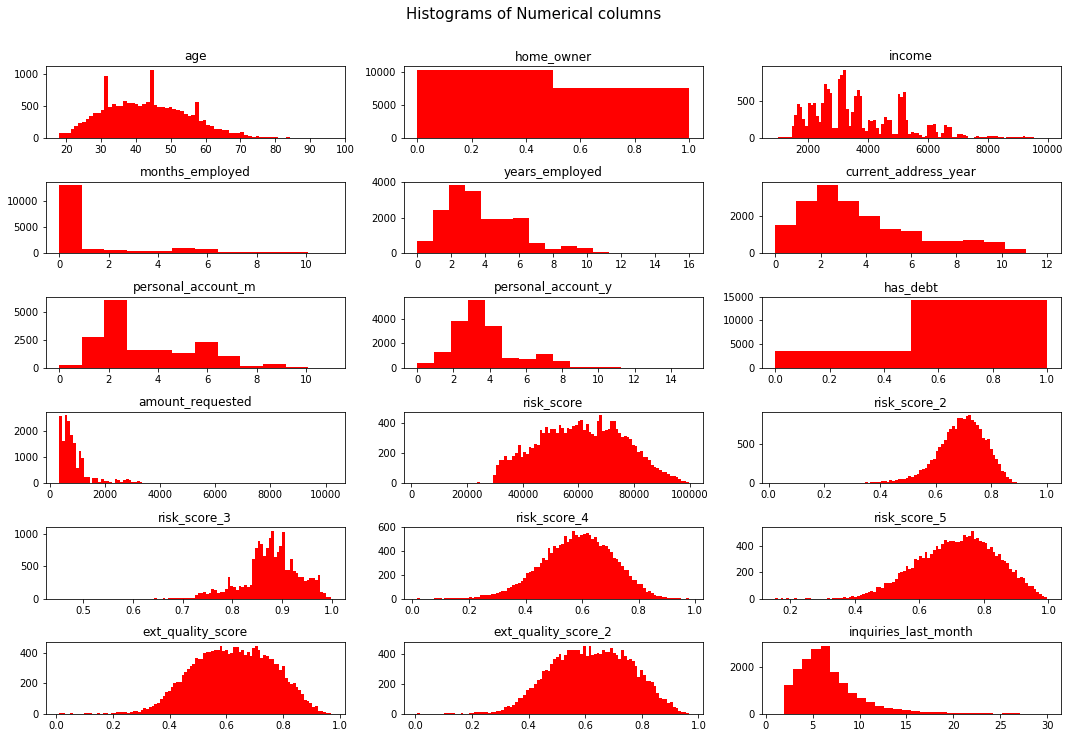

In [8]:
plt.figure(figsize= (15,15))  # define the size of entire plot

plt.suptitle("Histograms of Numerical columns ", fontsize = 15)  # the main title of the plot

for i in range(df1.shape[1]):  #iterating for every columns , df1.shape[1] defines number of columns i.e 18  
    plt.subplot(6, 3, i+1)  # plotting for every column
    f= plt.gca()                
    f.set_title(df1.columns.values[i])  # title of every plot is the column name 
    
    vals = np.size(df1.iloc[:,i].unique())
    if vals >=100 :
        vals=100
    plt.hist(df1.iloc[:,i], bins = vals, color = "red")
plt.tight_layout(rect = [ 0 , 0.3 , 1, 0.95])

##### correaltion plot with  dependent variable

df1.corrwith(df.e_signed).plot.bar(figsize= ( 15,15),
                                     title  = " correlation with e-signed",
                                     fontsize= 12,
                                     rot= 45,
                                     grid = True)

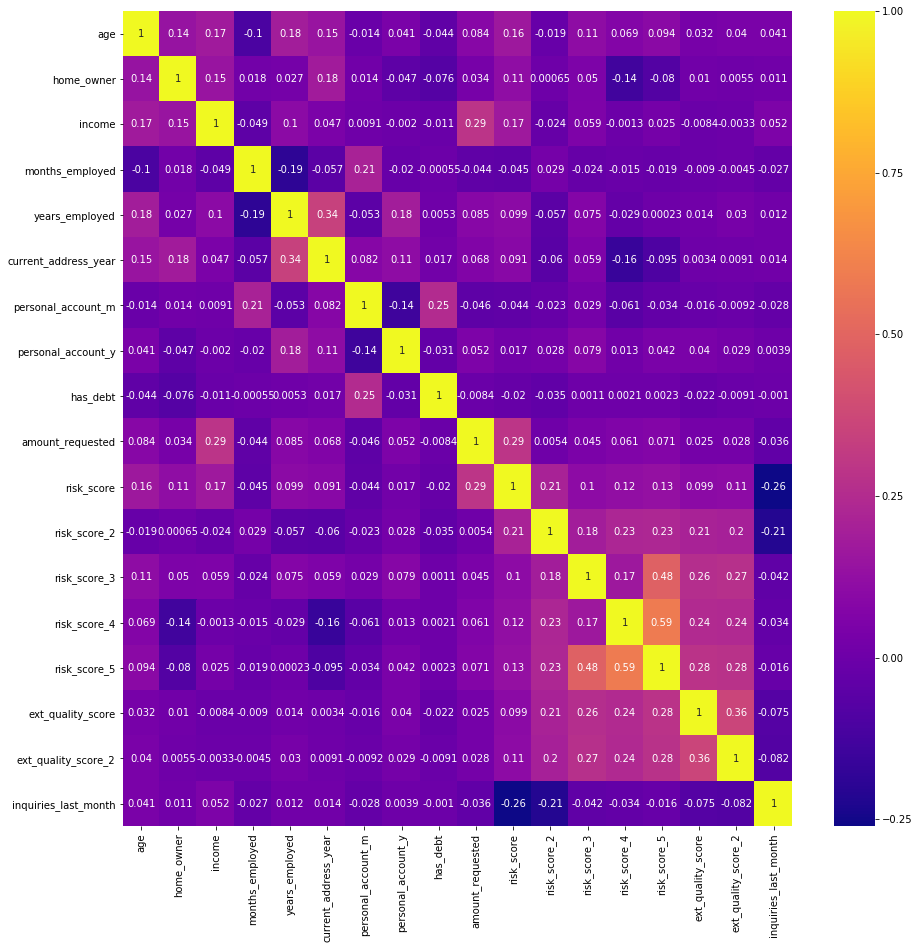

In [9]:

corr = df1.corr()

plt.figure(figsize = (15,15))
sns.heatmap(corr,annot = True , cmap="plasma")

### DATA PREPROCESING

##### FEATURE ENGINEERING

In [10]:
random.seed(100)

In [11]:
# removing the month_employed column

df = df.drop(columns=["months_employed"])
df.head()

,entry_id,age,pay_schedule,home_owner,income,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


 combining ```personal_account_m``` ```personal_account_y``` ... converting to total months

In [12]:
df["personal_account_months"]= (df["personal_account_m"]+df["personal_account_y"]*12)

In [13]:
df.head(3)

,entry_id,age,pay_schedule,home_owner,income,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months
0,7629673,40,bi-weekly,1,3135,3,3,6,2,1,...,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,30
1,3560428,61,weekly,0,3180,6,3,2,7,1,...,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,86
2,6934997,23,weekly,0,1540,0,0,7,1,1,...,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,19


In [14]:
df= df.drop(columns = ["personal_account_m","personal_account_y"])

In [15]:
df.head(3)

,entry_id,age,pay_schedule,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months
0,7629673,40,bi-weekly,1,3135,3,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,30
1,3560428,61,weekly,0,3180,6,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,86
2,6934997,23,weekly,0,1540,0,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,19


### one hot encoding

In [16]:
df= pd.get_dummies(df)

In [17]:
df.columns

Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

In [18]:
df.head()

,entry_id,age,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,...,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,3,3,1,550,36200,0.737398,...,0.515977,0.580918,0.380918,10,1,30,1,0,0,0
1,3560428,61,0,3180,6,3,1,600,30150,0.738510,...,0.826402,0.730720,0.630720,9,0,86,0,0,0,1
2,6934997,23,0,1540,0,0,1,450,34550,0.642993,...,0.762284,0.531712,0.531712,7,0,19,0,0,0,1
3,5682812,40,0,5230,6,1,1,700,42150,0.665224,...,0.778831,0.792552,0.592552,8,1,86,1,0,0,0
4,5335819,33,0,3590,5,2,1,1100,53850,0.617361,...,0.665523,0.744634,0.744634,12,0,98,0,0,1,0


In [ ]:
df= df.drop(columns= ["pay_schedule_semi-monthly"]) # remvoving extra dummy column

##### removing extra columns

In [ ]:
response = df["e_signed"]
user_id = df["entry_id"]
df= df.drop(columns= ["e_signed","entry_id"])

##### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test  = train_test_split(df,response,test_size = 0.3 , random_state= 0)

##### Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc_X = StandardScaler() # scaling for the X independent variables

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))

# We converted scaler output to dataframe beacuse its output is numpy array

# In scaling we loose the column names and index (O/P is numpy array) of all the values so we need to get it back


# recovering the column values
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

# recovering the indexes
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values


X_train = X_train2 
X_test = X_test2  

C:\Users\ISHU\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ISHU\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\ISHU\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ISHU\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Creating model

##### we are going to use ultiple model and then we will comapre them

##### 1 . Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier =  LogisticRegression(random_state = 0 , penalty = "l1")
classifier.fit(X_train,Y_train)

C:\Users\ISHU\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score

acc = accuracy_score(Y_test,y_pred)

prec = precision_score(Y_test,y_pred)

rec = recall_score(Y_test,y_pred)

f1 = f1_score(Y_test,y_pred)

# Above 4 values  wont give any outputbecaue of penalty in LogisticRegression so we need to convert it to dataframe

result = pd.DataFrame([["Linear Regression(Lasso)",acc,prec,rec,f1]],columns = ["Model","Accuracy","Precsion","Recall","F1_score"])

result


,Model,Accuracy,Precsion,Recall,F1_score
0,Linear Regression(Lasso),0.56877,0.579796,0.711211,0.638815


##### SUPPORT VECTOR MACHINE ( linear)

In [ ]:
from sklearn.svm import SVC

classifier =  SVC(random_state = 0 , kernel = "linear")
classifier.fit(X_train,Y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score

acc = accuracy_score(Y_test,y_pred)

prec = precision_score(Y_test,y_pred)

rec = recall_score(Y_test,y_pred)

f1 = f1_score(Y_test,y_pred)

# Above 4 values  wont give any outputbecaue of penalty in LogisticRegression so we need to convert it to dataframe

model_result = pd.DataFrame([["SVM(Linear)",acc,prec,rec,f1]],columns = ["Model","Accuracy","Precsion","Recall","F1_score"])

result = result.append(model_result,ignore_index = True)

result

,Model,Accuracy,Precsion,Recall,F1_score
0,Linear Regression(Lasso),0.568770,0.579796,0.711211,0.638815
1,SVM(Linear),0.571934,0.579307,0.736550,0.648533


##### SUPPORT VECTOR MACHINE (RBF)

In [ ]:
from sklearn.svm import SVC

classifier =  SVC(random_state = 0 , kernel = "rbf")
classifier.fit(X_train,Y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score

acc = accuracy_score(Y_test,y_pred)

prec = precision_score(Y_test,y_pred)

rec = recall_score(Y_test,y_pred)

f1 = f1_score(Y_test,y_pred)

# Above 4 values  wont give any outputbecaue of penalty in LogisticRegression so we need to convert it to dataframe

model_result = pd.DataFrame([["SVM(RBF)",acc,prec,rec,f1]],columns = ["Model","Accuracy","Precsion","Recall","F1_score"])

result = result.append(model_result,ignore_index = True)

result

,Model,Accuracy,Precsion,Recall,F1_score
0,Linear Regression(Lasso),0.568770,0.579796,0.711211,0.638815
1,SVM(Linear),0.571934,0.579307,0.736550,0.648533
2,SVM(RBF),0.596687,0.608313,0.695939,0.649182


##### RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state = 0 , n_estimators =100)
classifier.fit(X_train,Y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score

acc = accuracy_score(Y_test,y_pred)

prec = precision_score(Y_test,y_pred)

rec = recall_score(Y_test,y_pred)

f1 = f1_score(Y_test,y_pred)

# Above 4 values  wont give any outputbecaue of penalty in LogisticRegression so we need to convert it to dataframe

model_result = pd.DataFrame([["RandomForest(n=100)",acc,prec,rec,f1]],columns = ["Model","Accuracy","Precsion","Recall","F1_score"])

result = result.append(model_result,ignore_index = True)

result

,Model,Accuracy,Precsion,Recall,F1_score
0,Linear Regression(Lasso),0.568770,0.579796,0.711211,0.638815
1,SVM(Linear),0.571934,0.579307,0.736550,0.648533
2,SVM(RBF),0.596687,0.608313,0.695939,0.649182
3,RandomForest(n=100),0.631119,0.646369,0.688997,0.667003


##### K-Fold Cross validation for random forest to check if this model is consisitent throughout the data

In [ ]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier , X = X_train, y = Y_train,cv = 10)

print("RandomForestClassifier accuracy: %0.2f (+/- %0.2f)" %(accuracies.mean(),accuracies.std()*2))

RandomForestClassifier accuracy: 0.63 (+/- 0.02)


We can see the mean accuracy is almost same so we can say that this model is consistent throughout the data

### Parameter tuning

##### GRID SEARCH

##### ROUND 1  ENTROPY

In [ ]:
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["entropy"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = 1)


grid_search = grid_search.fit(X_train, Y_train)

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters


In [ ]:
# Round 2: Entropy
parameters = {"max_depth": [None],
              "max_features": [3, 5, 7],
              'min_samples_split': [8, 10, 12],
              'min_samples_leaf': [1, 2, 3],
              "bootstrap": [True],
              "criterion": ["entropy"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = 1)


grid_search = grid_search.fit(X_train, Y_train)


rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters


# Predicting Test Set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(Y_test, y_pred)
prec = precision_score(Y_test, y_pred)
rec = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100, GSx2 + Entropy)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)





In [ ]:
# Round 1: Gini
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["gini"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = 1)


grid_search = grid_search.fit(X_train, Y_train)


rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters



In [ ]:
# Round 2: Gini
parameters = {"max_depth": [None],
              "max_features": [8, 10, 12],
              'min_samples_split': [2, 3, 4],
              'min_samples_leaf': [8, 10, 12],
              "bootstrap": [True],
              "criterion": ["gini"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)


grid_search = grid_search.fit(X_train, Y_train)


rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters




In [ ]:
# Predicting Test Set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(Y_test, y_pred)
prec = precision_score(Y_test, y_pred)
rec = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100, GSx2 + Gini)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)




In [ ]:
## EXTRA: Confusion Matrix
cm = confusion_matrix(Y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))



#### End of Model ####




In [ ]:
# Formatting Final Results

final_results = pd.concat([Y_test, user_id], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results = final_results[['entry_id', 'e_signed', 'predictions']]